In [1]:
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_score
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Data Preparation and Preprocessing


In [3]:
url='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv'

In [4]:
df_init=pd.read_csv(url)

In [5]:
df_init.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
df_init.shape

(346, 10)

In [7]:
df_init.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [8]:
df=df_init[df_init.columns[2:]]
df['effective_date']=pd.to_datetime(df['effective_date'])
df['due_date']=pd.to_datetime(df['due_date'])

<ipython-input-8-ed4b2aedb322>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['effective_date']=pd.to_datetime(df['effective_date'])
<ipython-input-8-ed4b2aedb322>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['due_date']=pd.to_datetime(df['due_date'])


In [9]:
df['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION'], dtype=object)

In [10]:
df['terms'].unique()

array([30, 15,  7])

In [11]:
print(len(df[(df['loan_status']=='COLLECTION')]),"LOANS ARE IN COLLECTION")

86 LOANS ARE IN COLLECTION


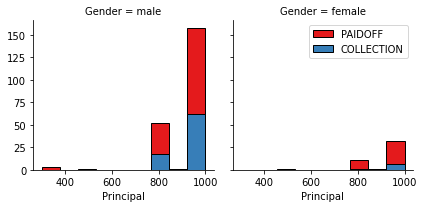

In [12]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

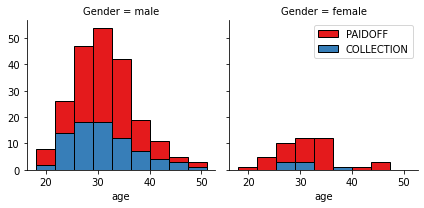

In [13]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

<ipython-input-14-ddcebe555ad2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df['effective_date'].dt.dayofweek


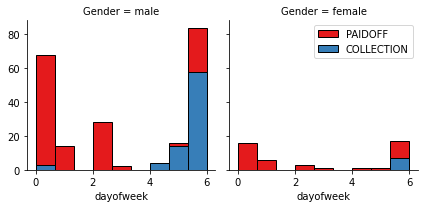

In [14]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

### Men are more likely to default thant women
### Getting a loean at the end of the week is more riskier
Let's add a column 'weekend' represeting this observation

In [15]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [16]:
le = preprocessing.LabelEncoder()
le_gender = le.fit_transform(df['Gender'])
le_education = le.fit_transform(df['education'])
#
features=['Principal', 'terms','age','education', 'Gender','weekend']
new_df=df[features]
#
new_df['Gender']=le_gender
new_df['education']=le_education

<ipython-input-16-abf356383a77>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Gender']=le_gender
<ipython-input-16-abf356383a77>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['education']=le_education


In [17]:
new_df.head()

,Principal,terms,age,education,Gender,weekend
0,1000,30,45,1,1,0
1,1000,30,33,0,0,0
2,1000,15,27,3,1,0
3,1000,30,28,3,0,1
4,1000,30,29,3,1,1


In [18]:
X=new_df.values
y=df['loan_status'].values
X.shape,y.shape

((346, 6), (346,))

### Scaling data

In [19]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (311, 6) (311,)
Test set: (35, 6) (35,)


## Finding optimal K number



In [21]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


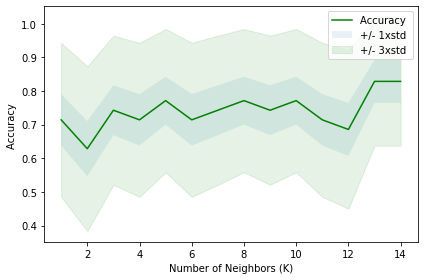

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [23]:
print( "The best accuracy for KNN ALGORITHM:", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy for KNN ALGORITHM: 0.8285714285714286 with k= 13


### KNN Final call and accuracy calculation


In [24]:
k=mean_acc.argmax()+1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
js_knn=jaccard_score(le.fit_transform(y_test),le.fit_transform(yhat),average='micro')
f1_knn=f1_score(y_test, yhat, average='weighted')
#
print("KNN Jaccard score: ", js_knn)
print("KNN f1 score: ", f1_knn)

KNN Jaccard score:  0.7073170731707317
KNN f1 score:  0.8399014778325123


In [25]:
Result=pd.DataFrame(index=['KNN','DT','SVM','LOG REG'],columns=['jacard','f1-score','logloss'])

In [26]:
Result.iloc[0][0]=js_knn
Result.iloc[0][1]=f1_knn

# Decison Tree Classification


In [27]:
DT_clf = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
DT_clf.fit(X_train,y_train)
y_pred=DT_clf.predict(X_test)
y_pred[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [28]:
js_dt=jaccard_score(le.fit_transform(y_test),le.fit_transform(y_pred),average='micro')
f1_dt=f1_score(y_test, y_pred, average='weighted')
#
print("DT Jaccard score: ", js_dt)
print("DT f1 score: ", f1_dt)

DT Jaccard score:  0.07692307692307693
DT f1 score:  0.7912087912087912


In [29]:
Result.iloc[1][0]=js_dt
Result.iloc[1][1]=f1_dt

# SVM Classification


In [30]:
SVM_clf = svm.SVC(kernel='poly',degree=3)
SVM_clf.fit(X_train, y_train)
yhat2 = SVM_clf.predict(X_test)

In [31]:
js_svm=jaccard_score(le.fit_transform(y_test),le.fit_transform(yhat2),average='micro')
f1_svm=f1_score(y_test, yhat2, average='weighted')
#
print("DT Jaccard score: ", js_svm)
print("DT f1 score: ", f1_svm)

DT Jaccard score:  0.7073170731707317
DT f1 score:  0.7767857142857143


In [32]:
Result.iloc[2][0]=js_svm
Result.iloc[2][1]=f1_svm

# LOGISTIC REGRESSION


In [33]:
LR = LogisticRegression(solver='liblinear').fit(X_train,y_train)
yhat3 = LR.predict(X_test)
#
yhat_prob = LR.predict_proba(X_test)
#

In [34]:
js_lr=jaccard_score(le.fit_transform(y_test),le.fit_transform(yhat3),average='micro')
f1_lr=f1_score(y_test, yhat3, average='weighted')
logloss_lr=log_loss(y_test, yhat_prob)
#
print("LOG REG Jaccard score: ", js_lr)
print("LOG REG f1 score: ", f1_lr)
print("LOG REG logloss score: ", logloss_lr)


LOG REG Jaccard score:  0.627906976744186
LOG REG f1 score:  0.7714285714285715
LOG REG logloss score:  0.49218895618561626


In [35]:
Result.iloc[3][0]=js_lr
Result.iloc[3][1]=f1_lr
Result.iloc[3][2]=logloss_lr

## FINAL RESULT TABLE

In [36]:
Result

,jacard,f1-score,logloss
KNN,0.707317,0.839901,NaN
DT,0.0769231,0.791209,NaN
SVM,0.707317,0.776786,NaN
LOG REG,0.627907,0.771429,0.492189
